In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from game import Game
from connect_net import ConnectNet
from nodes import DummyNode, Node
from simulation import Simulation
from memory import Memory

import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=3)

In [35]:
memory = Memory(folder='data/DeepFour-V0/memory', size=80000)
memory.load_memories()

print('Memory size:', len(memory.memory))

Memory size: 80000


In [36]:
values = [value for board, policy, value in memory.memory]
np.mean(values)

-0.1606625

In [37]:
for training in range(10):
    boards, policies, values = memory.get_minibatch(1024)
#     print(np.mean(values))
    print(np.mean(policies, 0))

[0.19 0.12 0.12 0.16 0.16 0.11 0.13]
[0.21 0.13 0.12 0.15 0.16 0.1  0.13]
[0.19 0.13 0.13 0.16 0.16 0.11 0.13]
[0.18 0.12 0.13 0.16 0.16 0.11 0.13]
[0.2  0.12 0.13 0.14 0.17 0.11 0.13]
[0.19 0.13 0.12 0.14 0.16 0.11 0.14]
[0.19 0.12 0.13 0.15 0.16 0.12 0.13]
[0.19 0.12 0.13 0.16 0.15 0.11 0.13]
[0.19 0.12 0.12 0.17 0.16 0.1  0.14]
[0.18 0.13 0.12 0.17 0.16 0.11 0.13]


In [44]:
zero = ConnectNet('DeepFour-V2')
zero.save(0)

In [41]:
zero = ConnectNet('DeepFour-V0')
zero.load(0)

def train(memory, net):
    # Load games from storage into working memory
    memory.load_memories()

    # If the memory is not filled yet, continue self play
    if not memory.filled:
        print(f'Memory not filled yet ({len(memory.memory)})')
        return
    else:
        print('Loaded memory of size:', len(memory.memory))

    for training in range(10):
        # Sample a minibatch
        boards, policies, values = memory.get_minibatch(1024)

        print(np.mean(values))

        # Train the model
        net.model.fit(boards, [policies, values], batch_size=32, shuffle=False, epochs=1)

    net.save('current')
    
train(memory, zero)

Loaded network: DeepFour-V0-0
Loaded memory of size: 80000
-0.1533203125
Epoch 1/1
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7398 - policy_loss: 1.7587 - value_loss: 0.8865
-0.189453125
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7978 - policy_loss: 1.7835 - value_loss: 0.9213
-0.1181640625
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7995 - policy_loss: 1.7668 - value_loss: 0.9404
-0.21484375
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7578 - policy_loss: 1.7732 - value_loss: 0.8916
-0.1953125
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7210 - policy_loss: 1.7699 - value_loss: 0.8576
-0.158203125
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7780 - policy_loss: 1.7846 - value_loss: 0.8997
-0.1416015625
Epoch 1/1
1024/1024 [==============================] - 2s 2ms/step - loss: 2.7803 - policy_loss: 1.7

In [45]:
# The simulation environment
simulation = Simulation(net_name='DeepFour-V2',
                        games_per_iteration=64,
                        moves_per_game=256,
                        memory_size=80000,
                        minibatch_size=256,
                        training_loops=10,
                        workers=16)

In [190]:
from scipy.special import softmax

In [230]:
softmax(np.random.uniform(.3, .7, size=(7)))

array([0.17, 0.12, 0.17, 0.12, 0.13, 0.16, 0.13])

In [182]:
np.tanh(np.random.uniform(-.5, .5))

-0.4434203957654287

In [231]:
Simulation.self_play(simulation, 0)

Game: 0 Move: X (53 ms) 

Value:   0.02
Q value: 0.03 

Policy:      | 0.13 | 0.15 | 0.14 | 0.14 | 0.13 | 0.18 | 0.13 |
Policy pred: | 0.12 | 0.12 | 0.14 | 0.20 | 0.10 | 0.17 | 0.15 |

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'X' ' ' ' ']]

Game: 0 Move: O (61 ms) 

Value:   -0.0
Q value: -0.05 

Policy:      | 0.13 | 0.14 | 0.16 | 0.13 | 0.14 | 0.15 | 0.15 |
Policy pred: | 0.14 | 0.14 | 0.15 | 0.14 | 0.14 | 0.15 | 0.14 |

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['O' ' ' ' ' ' ' 'X' ' ' ' ']]

Game: 0 Move: X (61 ms) 

Value:   0.03
Q value: -0.0 

Policy:      | 0.17 | 0.15 | 0.12 | 0.13 | 0.15 | 0.13 | 0.15 |
Policy pred: | 0.12 | 0.12 | 0.14 | 0.20 | 0.10 | 0.17 | 0.15 |

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' 

In [141]:
game = Game()
game.play(0)
game.play(6)
game.play(0)
game.play(5)
game.play(1)
game.play(4)
game.play(1)
game.presentation()

print('Current player:', game.player)
root = Node(game)
root = mcts(root, 150, net)

print(root.child_number_visits)
print(Simulation.get_policy(root, .1))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['O' 'O' ' ' ' ' ' ' ' ' ' ']
 ['O' 'O' ' ' ' ' 'X' 'X' 'X']]
Current player: -1
[20. 17. 17. 42. 18. 17. 18.]
[0. 0. 0. 1. 0. 0. 0.]


Loaded network: DeepFour-V1-current


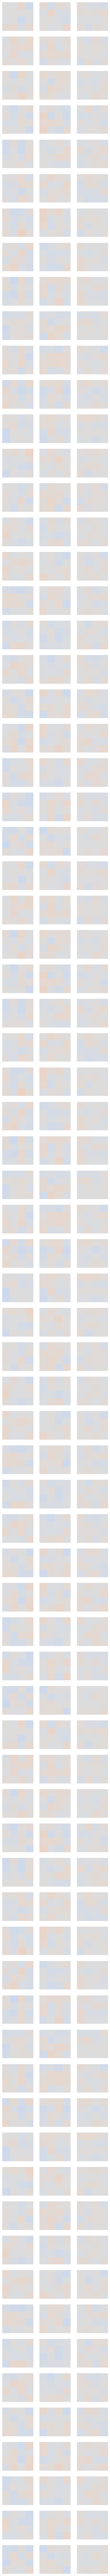

In [11]:
net = ConnectNet('DeepFour-V1')
net.load('current')

layer  = net.model.layers[1]

x = layer.get_weights()

weights = x[0]
s = weights.shape

fig = plt.figure(figsize=(s[2]*2, s[3]*2))  # width, height in inches
channel = 0
filter = 0
for i in range(s[2] * s[3]):
    sub = fig.add_subplot(s[3], s[2], i + 1)
    sub.imshow(weights[:, :, channel, filter], cmap='coolwarm', clim=(-1, 1), aspect="auto")
    plt.axis('off')
    channel = (channel + 1) % s[2]
    filter = (filter + 1) % s[3]